## 2D visualization

In [ ]:
import ee
import geemap

In [ ]:
Map = geemap.Map()
Map

In [ ]:
image = ee.Image('USGS/NED').select('elevation')
vis_params = {
    "min": 0,
    "max": 4000,
    "palette": ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}
Map.addLayer(image, vis_params, 'NED')


## 3D visualization

In [ ]:
import ee
import pydeck as pdk
from pydeck_earthengine_layers import EarthEngineTerrainLayer

In [ ]:
ee.Initialize()

In [ ]:
image = ee.Image('USGS/3DEP/10m').select('elevation')
terrain = ee.Image('USGS/3DEP/10m').select('elevation')
# image = ee.Image('MERIT/Hydro/v1_0_1').select('elv')
# terrain = ee.Image('MERIT/Hydro/v1_0_1').select('elv')


In [ ]:
image.getInfo()

In [ ]:
terrain.getInfo()

In [ ]:
vis_params = {
    "min": 0,
    "max": 3800,
    "palette": ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']
}

In [ ]:
ee_layer = EarthEngineTerrainLayer(image, terrain, vis_params, id="EETerrainLayer")

In [ ]:
ee_layer

In [ ]:
view_state = pdk.ViewState(
    latitude=36.15, longitude=-111.96, zoom=10.5, bearing=-66.16, pitch=60
)

r = pdk.Deck(layers=ee_layer, initial_view_state=view_state
                #  map_style='mapbox://styles/mapbox/streets-v11'  # Mapbox Streets style
)

r.show()

In [ ]:
42.44435704116091, 129.73581218350606

In [ ]:
import geemap
import ee

# Initialize the map
Map = geemap.Map()

# Set the map center and zoom level manually
Map.setCenter(lon=-111.96, lat=36.15, zoom=10)


# Load the image
image = ee.Image('USGS/3DEP/10m').select('elevation')

# Set up visualization parameters
vis_params = {
    "min": 0,
    "max": 4000,
    "palette": ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}

# Add the image layer to the map
Map.addLayer(image, vis_params, "Elevation")

# Set the map center and zoom level
Map.centerObject(image, 10)

# Display the map
Map


In [ ]:
import geemap
import ee

In [ ]:
# A digital elevation model.
dem = ee.Image('NASA/NASADEM_HGT/001').select('elevation')

# Calculate slope. Units are degrees, range is [0,90).
slope = ee.Terrain.slope(dem)

# Calculate aspect. Units are degrees where 0=N, 90=E, 180=S, 270=W.
aspect = ee.Terrain.aspect(dem)

# Display slope and aspect layers on the map.
m = geemap.Map()
m.set_center(-123.457, 47.815, 11)
m.add_layer(slope, {'min': 0, 'max': 89.99}, 'Slope')
m.add_layer(aspect, {'min': 0, 'max': 359.99}, 'Aspect')

# Use the ee.Terrain.products function to calculate slope, aspect, and
# hillshade simultaneously. The output bands are appended to the input image.
# Hillshade is calculated based on illumination azimuth=270, elevation=45.
terrain = ee.Terrain.products(dem)
display('ee.Terrain.products bands', terrain.bandNames())
m.add_layer(terrain.select('hillshade'), {'min': 0, 'max': 255}, 'Hillshade')
m

In [ ]:
ee.Initialize()

In [ ]:
pdk.Deck.mapbox_key = "pk.eyJ1IjoiZ2lnaXN1bmciLCJhIjoiY2xlMGhpM2hpMTV6dzNwbG9jN3g1bGg1MSJ9.za7zD76Y5ONC4-AFcERn_A"


In [3]:
from pydeck_earthengine_layers import EarthEngineLayer
import geemap.deck as geemap
import pydeck as pdk
import ee

# Initialize Earth Engine library
try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()

# Create an Earth Engine object
image = ee.Image('CGIAR/SRTM90_V4')

# Define Earth Engine visualization parameters
vis_params = {
    "min": -400,
    "max": 8000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}

# Create a pydeck EarthEngineLayer object, using the Earth Engine object and
# desired visualization parameters
ee_layer = EarthEngineLayer(image, vis_params)

# Define the initial viewport for the map
view_state = pdk.ViewState(
    latitude=37.7749295, longitude=-122.4194155, zoom=10, bearing=0, pitch=45
)

# Specify a Mapbox style URL

# Create a Deck instance, and display in Jupyter
r = pdk.Deck(layers=[ee_layer], initial_view_state=view_state)
r

{
  "initialViewState": {
    "bearing": 0,
    "latitude": 37.7749295,
    "longitude": -122.4194155,
    "pitch": 45,
    "zoom": 10
  },
  "layers": [
    {
      "@@type": "EarthEngineLayer",
      "_token": "ya29.a0AfB_byCW-3dlE6dSMvezfrRFJjV3jd2VWZjBDl85Gh0DheVAWPnYZJip-XQwCtakknEwUf1f5Nnb7lTRto7MnJW6F8jf4Eoq9QETbERgY-z2wUnscddj56kdpbH_vRvRLHFgwl-B6YuDvC1LfAGwtoy5nWhvQx33F595nAaCgYKAfcSARMSFQGOcNnClCblSseJLR4L46WnwNcp8w0173",
      "eeObject": "{\"result\": \"0\", \"values\": {\"0\": {\"functionInvocationValue\": {\"functionName\": \"Image.load\", \"arguments\": {\"id\": {\"constantValue\": \"CGIAR/SRTM90_V4\"}}}}}}",
      "id": "a546cf82-b9a6-447a-a04f-34efcee91793",
      "visParams": {
        "max": 8000,
        "min": -400,
        "palette": [
          "006633",
          "E5FFCC",
          "662A00",
          "D8D8D8",
          "F5F5F5"
        ]
      }
    }
  ],
  "mapProvider": "carto",
  "mapStyle": "https://basemaps.cartocdn.com/gl/dark-matter-gl-style/style.json",
  "views": [
    {
      "@@type": "MapView",
      "controller": true
    }
  ]
}

In [4]:
import os
import leafmap

In [5]:
url = 'https://open.gishub.org/data/raster/srtm90.tif'

In [6]:
image = 'dem_output.tif'
if not os.path.exists(image):
    leafmap.download_file(url, image)

In [7]:
image

'dem_output.tif'

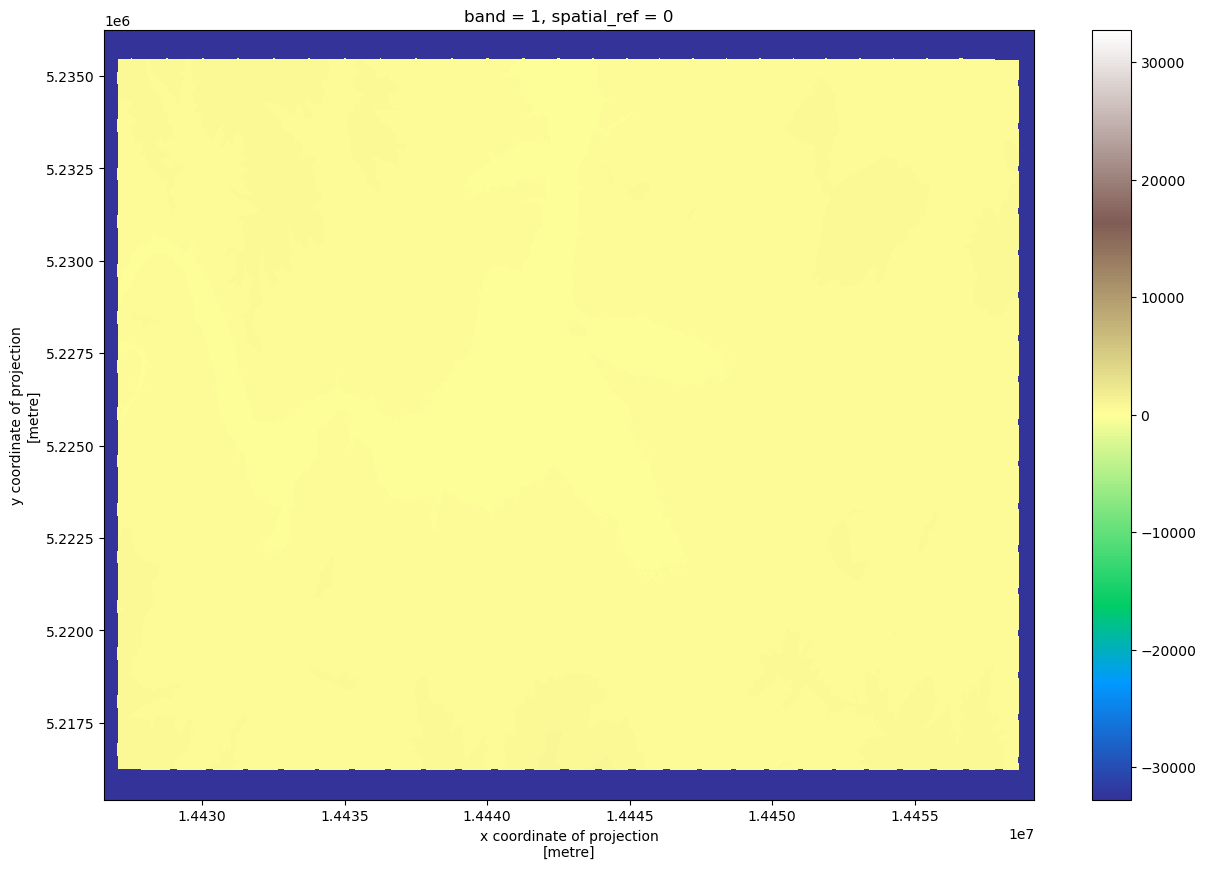

In [10]:
leafmap.plot_raster(image, cmap='terrain', figsize=(15, 10))


In [9]:
!pip install rioxarray pyvista-xarray


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 MB 1.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.3 MB/s eta 0:00:00
